In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
ls

custom_data/           gz_files/         PARCELLES_GRAPHIQUES.gpkg*
data-conversion.ipynb  image.npy         result/
data_mod/              images/           sampled.gpkg
data_mod2/             images2/          seasonal_data/
data_s2_n/             images3/          semantic_result/
france_672.tar.gz      m_data/           tf_files/
France_Data_Rep.ipynb  metadata.geojson  zip_file/
france_dataset.tar.gz  metadata.json


In [4]:
from PIL import Image

# Load the PNG image
image = Image.open('images2/0000.png')

# Convert the image to a NumPy array
image_array = np.array(image)

# Save the NumPy array as an .npy file
np.save('image.npy', image_array)

In [6]:
data = np.load('image.npy')

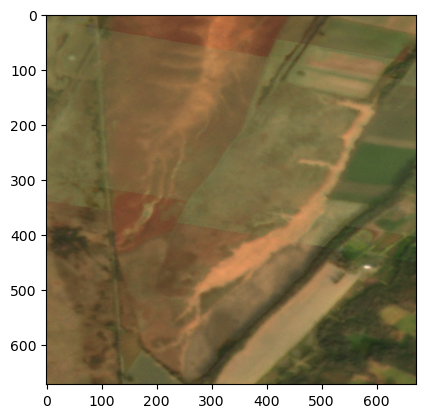

In [9]:
plt.imshow(data)
plt.show()

In [7]:
data.shape

(672, 672, 3)

In [8]:
# data_swapped = np.transpose(data, (2, 0, 1))

In [9]:
data_swapped.shape

NameError: name 'data_swapped' is not defined

In [12]:
# Resize the image to (128, 128)
import cv2
resized_image = cv2.resize(data, (128, 128))

In [17]:
resized_image.shape

(128, 128, 3)

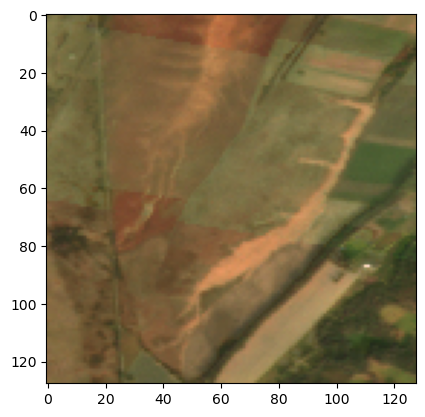

In [18]:
plt.imshow(resized_image)
plt.show()

In [19]:
data_swapped = np.transpose(resized_image, (2, 0, 1))

In [20]:
data_swapped.shape

(3, 128, 128)

In [26]:
list_image = np.expand_dims(data_swapped, axis=0)
list_image

array([[[[108, 115, 122, ..., 134, 140, 143],
         [111, 117, 129, ..., 133, 137, 144],
         [123, 126, 130, ..., 134, 140, 148],
         ...,
         [130, 130, 129, ..., 103, 106, 104],
         [138, 131, 124, ...,  99,  98, 101],
         [133, 134, 130, ..., 106, 103, 102]],

        [[ 97, 108, 115, ..., 114, 116, 117],
         [106, 111, 119, ..., 115, 115, 118],
         [116, 121, 124, ..., 114, 117, 123],
         ...,
         [100, 101, 104, ..., 103,  97,  95],
         [106, 106, 104, ..., 106, 108, 102],
         [110, 109, 109, ..., 108, 105, 100]],

        [[ 59,  64,  66, ...,  66,  70,  71],
         [ 65,  68,  76, ...,  66,  70,  71],
         [ 76,  75,  76, ...,  69,  71,  74],
         ...,
         [ 65,  65,  63, ...,  52,  54,  54],
         [ 65,  65,  62, ...,  51,  49,  51],
         [ 69,  64,  65, ...,  52,  49,  47]]]], dtype=uint8)

In [25]:
list_image.shape

(1, 3, 128, 128)

In [12]:
from PIL import Image

In [13]:
pil_image = Image.fromarray((data * 255).astype(np.uint8))

# Resize the image to (128, 128)
resized_image = pil_image.resize((128, 128))

# Convert PIL Image back to NumPy array
resized_image_array = np.array(resized_image)

print(resized_image_array.shape) 

(128, 128, 3)


In [14]:
def get_image(im):
    """Utility function to get a displayable RGB image 
    from a Sentinel-2 time series.
    """
    # im = x[t_show, [2, 1, 0]]
    mx = im.max(axis=(0,1))
    mi = im.min(axis=(0,1))   
    im = (im - mi[:,None,None])/(mx - mi)[:,None,None]
    im = im.swapaxes(0,2).swapaxes(0,1)
    im = np.clip(im, a_max=1, a_min=0)
    return im

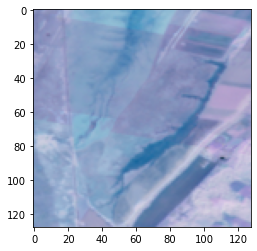

In [15]:
plt.imshow(resized_image_array)
plt.show()

In [27]:
ls

data-conversion.ipynb  gz_files/         PARCELLES_GRAPHIQUES.gpkg*
data_mod/              image.npy         sampled.gpkg
data_mod2/             images2/          seasonal_data/
france_672.tar.gz      metadata.geojson  tf_files/
france_dataset.tar.gz  metadata.json     zip_file/


In [1]:
ls

data-conversion.ipynb  gz_files/  metadata.geojson            seasonal_S2/
data_mod/              image.npy  metadata.json               semantic_result/
data_mod2/             images/    PARCELLES_GRAPHIQUES.gpkg*  tf_files/
france_672.tar.gz      images2/   result/                     zip_file/
France_Data_Rep.ipynb  images4/   sampled.gpkg
france_dataset.tar.gz  m_data/    seasonal_data/


In [30]:
data_s2 = np.load("m_data/DATA_S2/S2_0.npy")
data_s2.shape

(1, 10, 128, 128)

In [89]:
data_s2 = np.load("images/275.npy")
data_s2.shape

(128, 128, 10)

In [90]:
repeated_image = np.tile(data_s2, (43, 1, 1, 1))
repeated_image.shape

(43, 128, 128, 10)

In [91]:
data_swapped = np.transpose(repeated_image, (0, 3, 1, 2))
data_swapped.shape


(43, 10, 128, 128)

In [96]:
def get_rgb(x, batch_index=0, t_show=1):
    """Utility function to get a displayable RGB image 
    from a Sentinel-2 time series.
    """
    im = x[t_show][[2, 1, 0]]
    # im = x[t_show][[0, 1, 2]]
    mx = im.max(axis=(1,2))
    mi = im.min(axis=(1,2))   
    im = (im - mi[:,None,None])/(mx - mi)[:,None,None]
    im = im.swapaxes(0,2).swapaxes(0,1)
    im = np.clip(im, a_max=1, a_min=0)
    return im

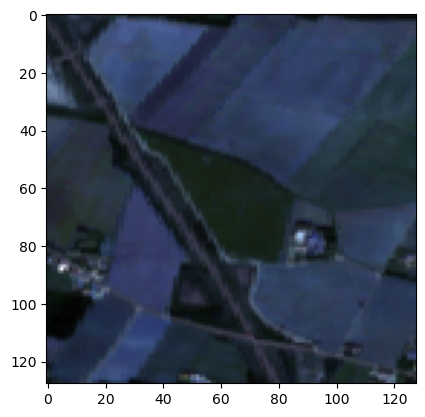

In [95]:
plt.imshow(get_rgb(data_swapped, batch_index=bid, t_show=0))

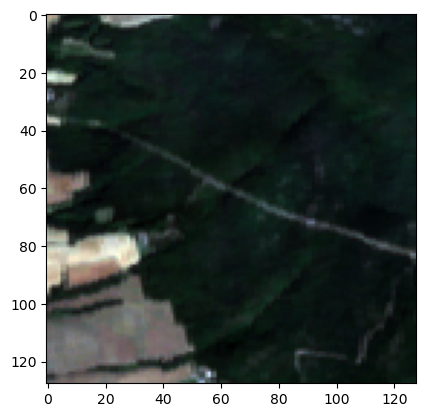

In [79]:
plt.imshow(get_rgb(data_swapped, batch_index=bid, t_show=0))

In [9]:
list_image = np.expand_dims(data_swapped, axis=0)
list_image.shape

(1, 10, 128, 128)

In [101]:
import os, sys
import numpy as np

path = "images"
res_path = "images/DATA_S2/"

dirs = os.listdir( path )
#(channel, height, width format)
def data_duplication():
    # i = 0
    # Append images to a list
    for file in dirs:
        if file.endswith('.npy'):
            filename = os.path.splitext(os.path.basename(file))[0]
            # if(int(filename) < 60):
            # print(file)
            # i+=1
            # Convert the image to a NumPy array
            # image_array = np.array(image)
            image_array = np.load(path+ "/"+file)
            repeated_image = np.tile(image_array, (43, 1, 1, 1))
            data_swapped = np.transpose(repeated_image, (0, 3, 1, 2))
            # Save the NumPy array as an .npy file
            np.save(res_path+'S2_'+filename+'.npy', data_swapped)
            # print(res_path+'S2_'+filename+'.npy')
            # break

print('done')

done


In [102]:
data_duplication()
print('done')

OSError: [Errno 28] No space left on device: 'images/DATA_S2/S2_2226.npy'

In [39]:
path = "seasonal_data/img0104/images"
res_path = "seasonal_S2/img0104/"
import os, sys
dirs = os.listdir( path )

def data_conversion():
    # Append images to a list
    for file in dirs:
        
        if file.endswith('.png'):
            i+=1
            print(file)
            image_array = np.array(image)
            # print('prev-size',image_array.shape )
            # plt.imshow(image_array)
            # plt.show()
            resized_image = cv2.resize(image_array, (128, 128))
           
            
            filename = os.path.splitext(os.path.basename(file))[0]
            # Save the NumPy array as an .npy file
            np.save(res_path+filename+'.npy', list_image)
            # print('new-size',resized_image.shape )
            # plt.imshow(resized_image)
            # plt.show()
            
            
        # if os.path.isfile(path+item):
        #     im = Image.open(path+item).convert("RGB")
        #     im = np.array(im)
        #     x_train.append(im)

In [40]:
data_conversion()

1740.png


In [13]:
import os, sys
import numpy as np

path = "images"
res_path = "m_data/DATA_S2/"

dirs = os.listdir( path )
#(channel, height, width format)
def data_conversion_diff():
    # Append images to a list
    for file in dirs:
        if file.endswith('.png'):
            # print(file)
            # Load the PNG image
            image = Image.open(path+ "/"+file)

            # Convert the image to a NumPy array
            image_array = np.array(image)
            # print('prev-size',image_array.shape )
            # plt.imshow(image_array)
            # plt.show()
            resized_image = cv2.resize(image_array, (128, 128))
            data_swapped = np.transpose(resized_image, (2, 0, 1))
            list_image = np.expand_dims(data_swapped, axis=0)
            
            filename = os.path.splitext(os.path.basename(file))[0]
            # Save the NumPy array as an .npy file
            np.save(res_path+'S2_'+filename+'.npy', list_image)
            # print('new-size',resized_image.shape )
            # plt.imshow(resized_image)
            # plt.show()
            

In [14]:
data_conversion_diff()

1740.png
2656.png
1736.png
1989.png
3215.png
1597.png
1928.png
1207.png
1172.png
1910.png
971.png
1862.png
1524.png
105.png
326.png
635.png
2566.png
2125.png
351.png
2562.png
1933.png
2700.png
432.png
426.png
2001.png
1392.png
3220.png
1835.png
2042.png
2276.png
3283.png
1041.png
1271.png
1091.png
129.png
2788.png
2187.png
629.png
2490.png
1644.png
2257.png
1959.png
2312.png
1813.png
3109.png
1058.png
2909.png
2235.png
545.png
55.png
2383.png
1105.png
1803.png
1404.png
323.png
305.png
2149.png
2624.png
1879.png
2782.png
93.png
389.png
2230.png
638.png
123.png
1064.png
2151.png
2166.png
1519.png
677.png
18.png
529.png
436.png
2907.png
707.png
1212.png
1758.png
1971.png
2065.png
1434.png
2440.png
1931.png
1175.png
2446.png
2971.png
2699.png
1920.png
712.png
3138.png
2378.png
1072.png
1970.png
2835.png
2721.png
514.png
332.png
313.png
405.png
2685.png
2668.png
1645.png
1446.png
1315.png
613.png
2443.png
2590.png
2967.png
1063.png
3074.png
3040.png
2599.png
656.png
2484.png
2613.png
308.pn

In [15]:
#retrive saved data

import numpy as np
import matplotlib.pyplot as plt

In [16]:
ls

data-conversion.ipynb  gz_files/  metadata.geojson            seasonal_S2/
data_mod/              image.npy  metadata.json               tf_files/
data_mod2/             images/    PARCELLES_GRAPHIQUES.gpkg*  zip_file/
france_672.tar.gz      images2/   sampled.gpkg
france_dataset.tar.gz  m_data/    seasonal_data/


In [20]:
i_parcel = np.load(res_path+'S2_1940.npy')
i_parcel.shape

(1, 3, 128, 128)

In [21]:
p_image = np.transpose(i_parcel[0], (1, 2, 0))

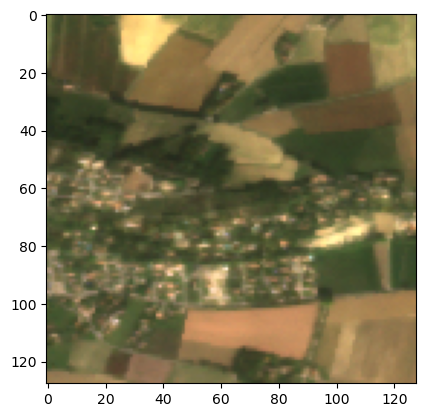

In [22]:
plt.imshow(p_image)

In [113]:
import os, sys
import numpy as np

path = "images"
res_path = "images/DATA_S2/"

dirs = os.listdir( path )
#(channel, height, width format)
def data_conversion_npy():
    # Append images to a list
    for file in dirs:
        if file.endswith('.npy'):
            # print(file)
            # Load the PNG image
            image_array = np.load(path+ "/"+file)
            data_swapped = np.transpose(image_array, (2, 0, 1))
            list_image = np.expand_dims(data_swapped, axis=0)
            
            filename = os.path.splitext(os.path.basename(file))[0]
            # Save the NumPy array as an .npy file
            np.save(res_path+'S2_'+filename+'.npy', list_image)
            # print('new-size',list_image.shape )
            # plt.imshow(resized_image)
            # plt.show()
            # break
            

In [114]:
data_conversion_npy()
print('done')

done


In [25]:
ls

all_dataset/           image.npy         PARCELLES_GRAPHIQUES.gpkg*
all_data.tar.gz        images/           result/
data-conversion.ipynb  images2/          sampled.gpkg
data_mod/              images3/          seasonal_data/
data_mod2/             imagesMixed/      semantic_result/
france_672.tar.gz      m_backup/         tf_files/
France_Data_Rep.ipynb  m_data/           zip_file/
france_dataset.tar.gz  metadata.geojson
gz_files/              metadata.json


In [16]:
image = np.load("m_data/DATA_S2/S2_0.npy")
image.shape

(1, 10, 128, 128)

In [106]:
def get_rgb(x, batch_index=0, t_show=1):
    """Utility function to get a displayable RGB image 
    from a Sentinel-2 time series.
    """
    im = x[t_show][[2, 1, 0]]
    mx = im.max(axis=(1,2))
    mi = im.min(axis=(1,2))   
    im = (im - mi[:,None,None])/(mx - mi)[:,None,None]
    im = im.swapaxes(0,2).swapaxes(0,1)
    im = np.clip(im, a_max=1, a_min=0)
    return im

In [107]:
# 2.npy ,14.npy , 37.npy, 51.npy, 21.npy, 43.npy, 42.npy, 18.npy, 8.npy, 20.npy

image = np.load("images/DATA_S2/S2_993.npy")
image.shape

(1, 10, 128, 128)

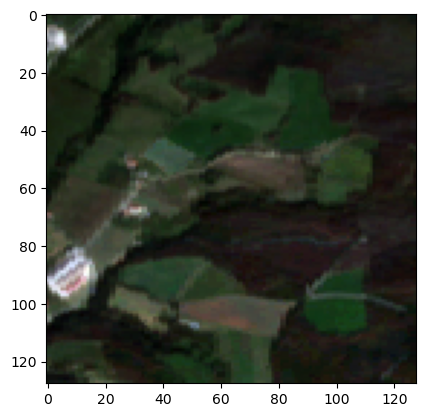

In [108]:
# data_swapped



bid = 0
# Iterate over all t_show values and plot in the grid
plt.imshow(get_rgb(image, batch_index=bid, t_show=0))

Temporal Data Display


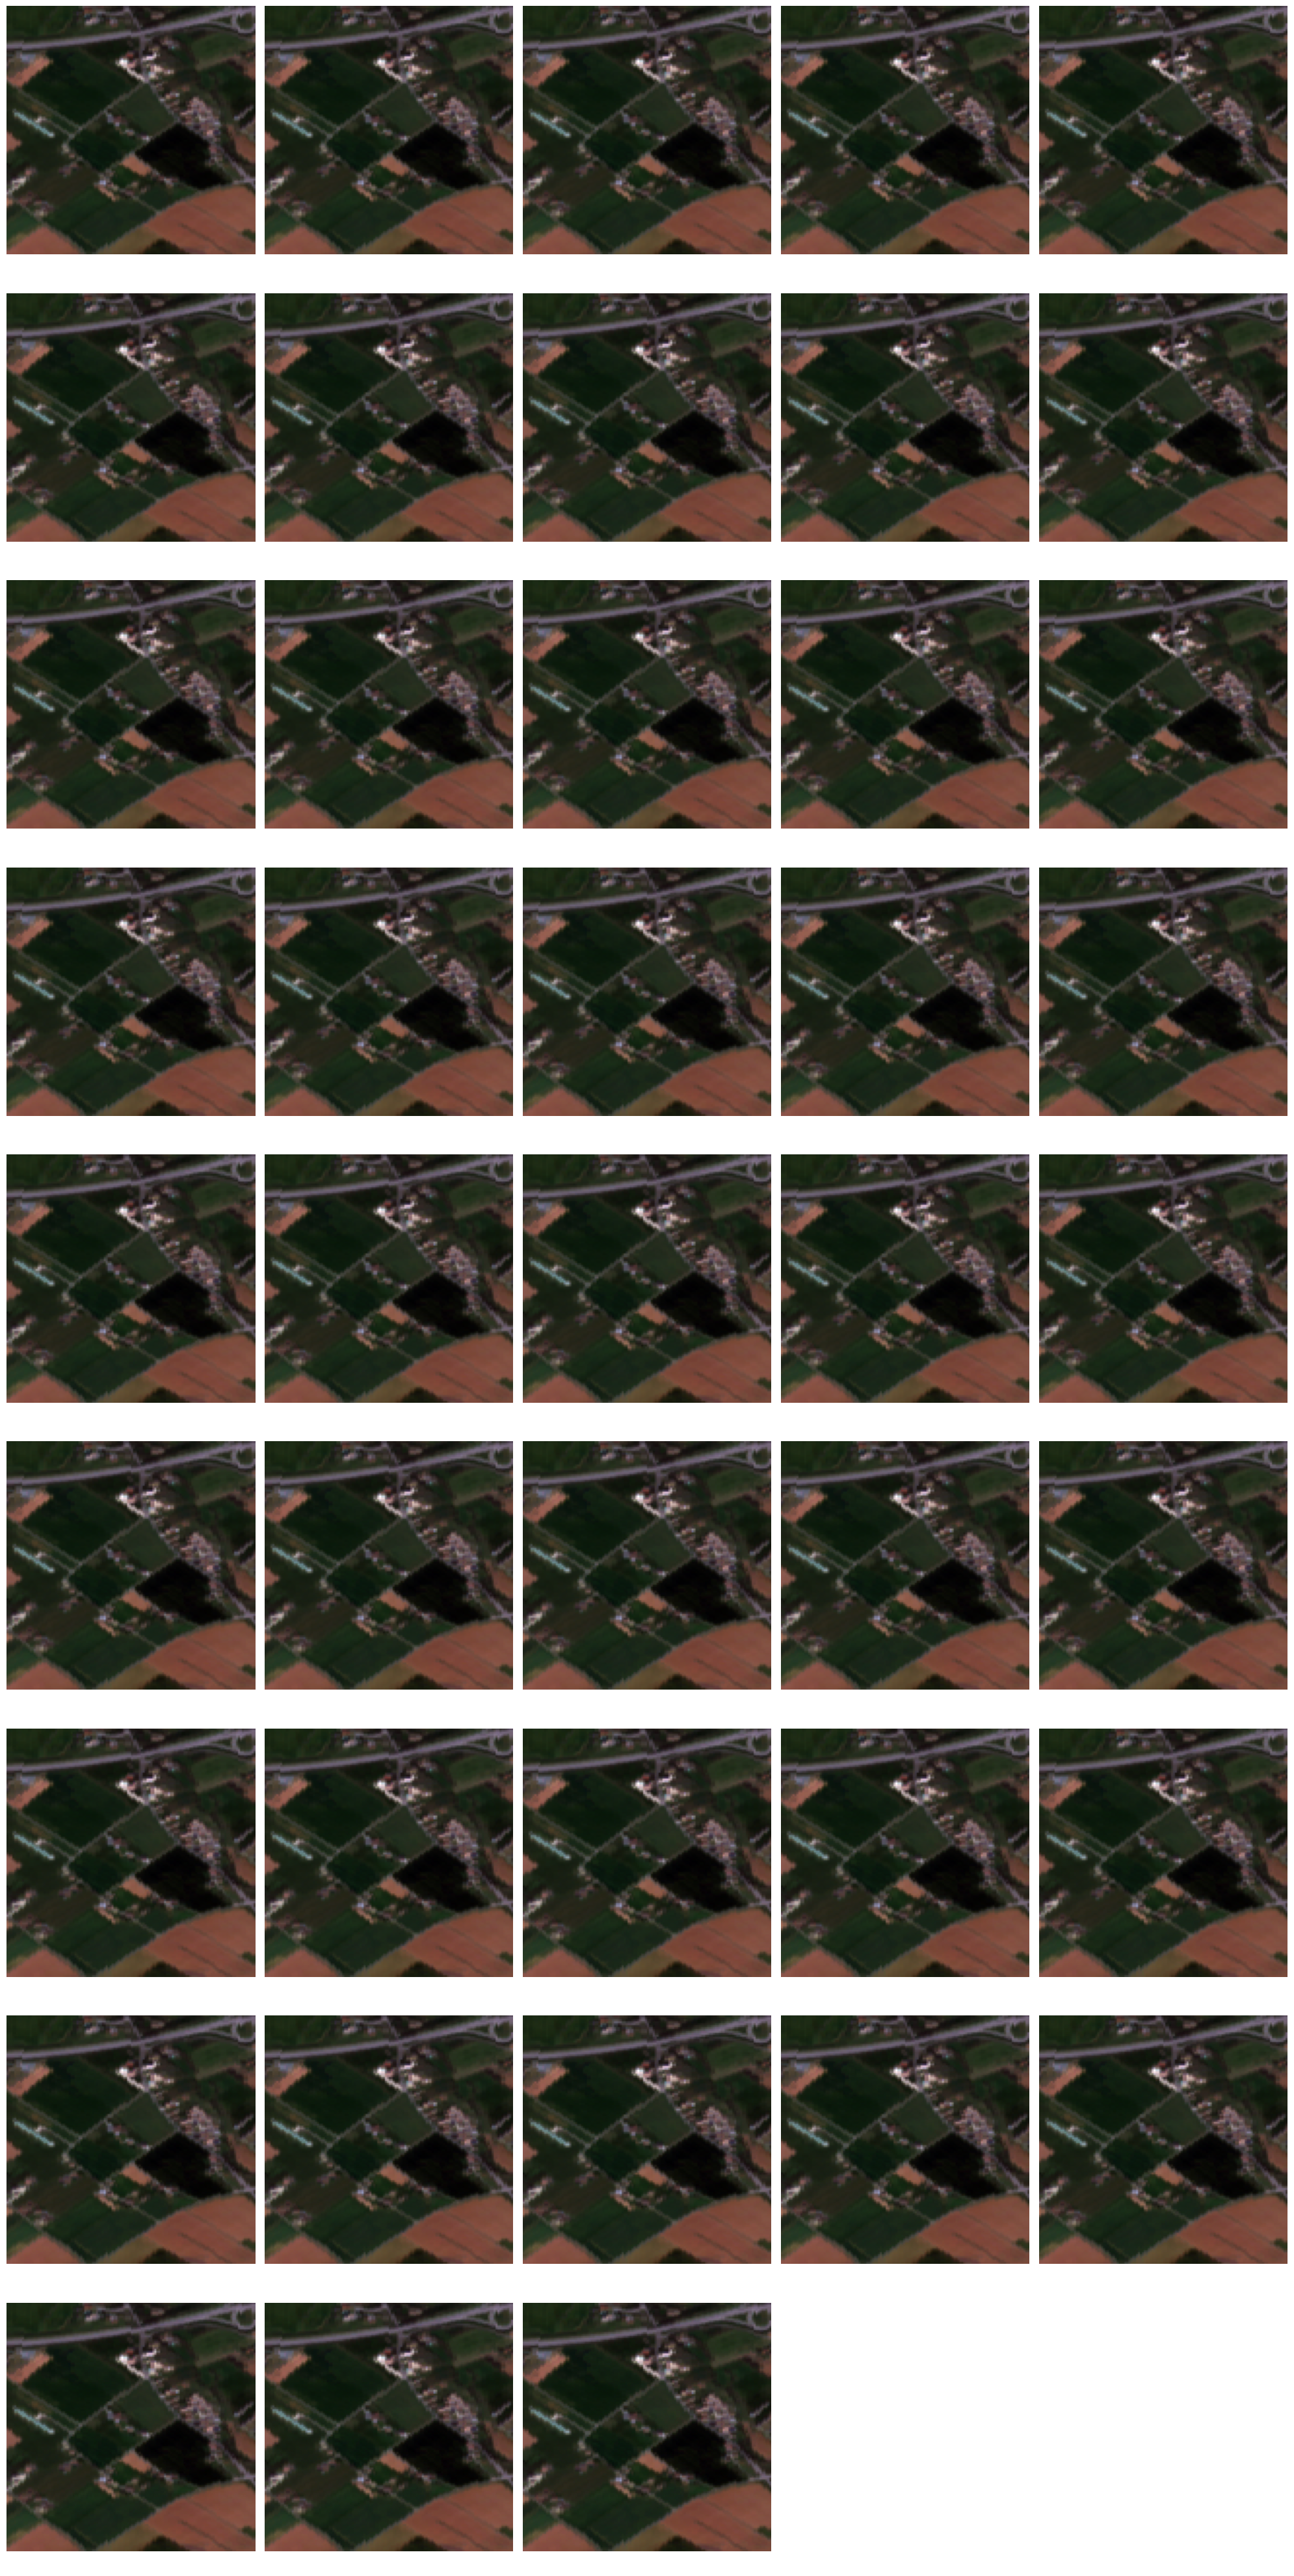

In [21]:
print('Temporal Data Display')
fig, axes = plt.subplots(9, 5, figsize=(20, 40))
bid = 4

 
data_swapped =  np.load("custom_data/DATA_S2/S2_0.npy")
# Iterate over all t_show values and plot in the grid
for i, ax in enumerate(axes.flat):
    if i < data_swapped.shape[0]:
        ax.imshow(get_rgb(data_swapped, batch_index=bid, t_show=i))
    ax.axis('off')

plt.tight_layout()
plt.show()

In [14]:
import os, sys
import numpy as np

path = "custom_data/DATA_S2/"
res_path = "custom_data/DATA_S2/p/"

dirs = os.listdir( path )
#(channel, height, width format)
def data_duplication():
    # Append images to a list
    for file in dirs:
        if file.endswith('.npy'):
            filename = os.path.splitext(os.path.basename(file))[0]
            print(file)
            image_array = np.load(path+ "/"+file)
            image_array = image_array * 2188
            # Save the NumPy array as an .npy file
            np.save(res_path+filename+'.npy', image_array)
            print(res_path+filename+'.npy')
            # break


In [15]:
data_duplication()

S2_15.npy
custom_data/DATA_S2/p/S2_15.npy
S2_53.npy
custom_data/DATA_S2/p/S2_53.npy
S2_48.npy
custom_data/DATA_S2/p/S2_48.npy
S2_40.npy
custom_data/DATA_S2/p/S2_40.npy
S2_1.npy
custom_data/DATA_S2/p/S2_1.npy
S2_14.npy
custom_data/DATA_S2/p/S2_14.npy
S2_8.npy
custom_data/DATA_S2/p/S2_8.npy
S2_19.npy
custom_data/DATA_S2/p/S2_19.npy
S2_46.npy
custom_data/DATA_S2/p/S2_46.npy
S2_17.npy
custom_data/DATA_S2/p/S2_17.npy
S2_16.npy
custom_data/DATA_S2/p/S2_16.npy
S2_5.npy
custom_data/DATA_S2/p/S2_5.npy
S2_56.npy
custom_data/DATA_S2/p/S2_56.npy
S2_55.npy
custom_data/DATA_S2/p/S2_55.npy
S2_59.npy
custom_data/DATA_S2/p/S2_59.npy
S2_42.npy
custom_data/DATA_S2/p/S2_42.npy
S2_27.npy
custom_data/DATA_S2/p/S2_27.npy
S2_57.npy
custom_data/DATA_S2/p/S2_57.npy
S2_35.npy
custom_data/DATA_S2/p/S2_35.npy
S2_3.npy
custom_data/DATA_S2/p/S2_3.npy
S2_11.npy
custom_data/DATA_S2/p/S2_11.npy
S2_29.npy
custom_data/DATA_S2/p/S2_29.npy
S2_34.npy
custom_data/DATA_S2/p/S2_34.npy
S2_54.npy
custom_data/DATA_S2/p/S2_54.npy


In [18]:
# [[25],[55], [35],   [53]
 
instance_a =  np.load("custom_data/INSTANCE_ANNOTATIONS/INSTANCES_53.npy")
instance_a.shape

(128, 128)

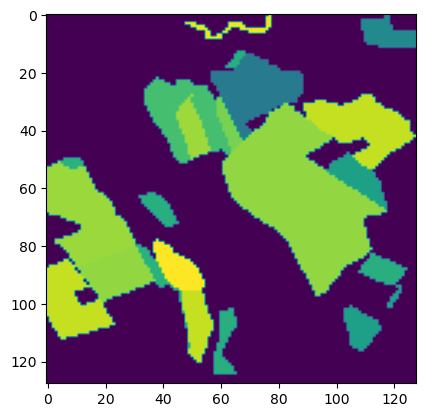

In [19]:
plt.imshow(instance_a)

In [3]:
print('Temporal Data Display')

bid = 0
data_swapped = np.load('images/DATA_S2/S2_2.npy')
# Iterate over all t_show values and plot in the grid
plt.imshow(get_rgb(data_swapped, batch_index=bid, t_show=0))
 

Temporal Data Display


NameError: name 'plt' is not defined

In [7]:
separate_i_masks = np.load('i_mask/8_instance_mask.npy')
separate_i_masks.shape

(19, 128, 128)

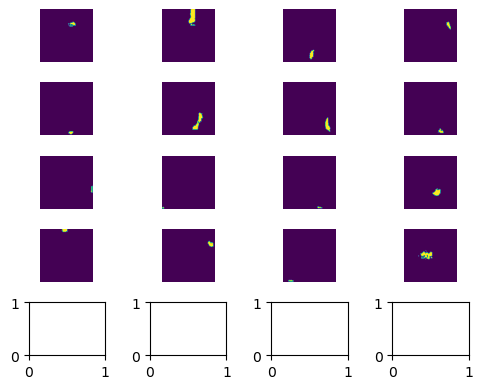

In [9]:
r = 5
c =4
fig, axs = plt.subplots(r, c, figsize=(5, 4))

for i in range(separate_i_masks.shape[0]):
    axs[i//r, i%c].imshow(separate_i_masks[i, :, :])
    # axs[i//r, i%c].set_title(f"Instance {i+1}")
    axs[i//r, i%c].axis('off')
    
plt.tight_layout()
plt.show()

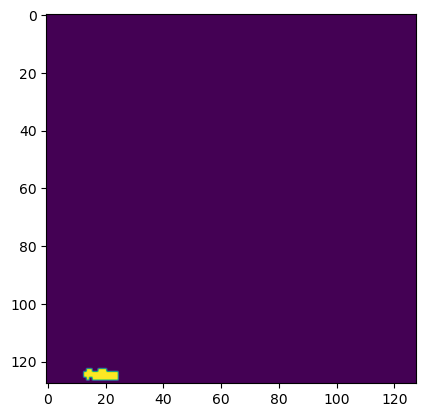

In [12]:
plt.imshow(separate_i_masks[18, :,:])